This notebook takes UK postcode information and matches this up with [nomis population data](https://www.nomisweb.co.uk/census/2011/postcode_headcounts_and_household_estimates)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon

### Postcodes

In [49]:
pc = pd.read_csv('ukpostcodes.csv', index_col='postcode')

In [50]:
pc.head()

,id,latitude,longitude
postcode,,,
AB10 1XG,1,57.144165,-2.114848
AB10 6RN,2,57.137880,-2.121487
AB10 7JB,3,57.124274,-2.127190
AB11 5QN,4,57.142701,-2.093295
AB11 6UL,5,57.137547,-2.112233


In [51]:
len(pc)

1766510

### Population

In [52]:
pop1 = pd.read_csv('Postcode_Estimates_Table_1.csv', index_col='Postcode')

In [53]:
pop1.head()

,Total,Males,Females,Occupied_Households
Postcode,,,,
AL1 1AG,14,6,8,6
AL1 1AJ,124,60,64,51
AL1 1AR,32,17,15,17
AL1 1AS,34,17,17,13
AL1 1BH,52,15,37,41


In [54]:
males = np.sum(pop1['Males'])
females = np.sum(pop1['Females'])

In [55]:
print ('This dataset accounts for a popultion of {}, whereas the total population in 2011 was 63.18M'.format(males+females))

This dataset accounts for a popultion of 56075912, whereas the total population in 2011 was 63.18M


### Mapping

In [59]:
data = pd.concat([pc,pop1], axis=1).dropna()

In [72]:
data.to_csv('postcode_population.csv')

In [61]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

In [62]:
gdf.head()

,id,latitude,longitude,Total,Males,Females,Occupied_Households,geometry
BB1 3HL,409.0,53.750024,-2.456991,29.0,21.0,8.0,20.0,POINT (-2.45699 53.75002)
BB1 3HN,410.0,53.751710,-2.453370,169.0,87.0,82.0,62.0,POINT (-2.45337 53.75171)
BB1 3HW,416.0,53.752421,-2.448419,123.0,54.0,69.0,42.0,POINT (-2.44842 53.75242)
BB1 3HY,417.0,53.751346,-2.445178,55.0,27.0,28.0,27.0,POINT (-2.44518 53.75135)
BB1 3JB,419.0,53.751613,-2.445801,83.0,44.0,39.0,38.0,POINT (-2.44580 53.75161)


In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

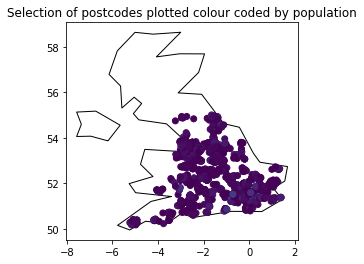

In [71]:
ax = world[world.name == 'United Kingdom'].plot(
    color='white', edgecolor='black')
gdf[-20000:].plot(ax=ax, c=gdf.Total[-20000:])
ax.set_title('Selection of postcodes plotted colour coded by population')
plt.show()